In [54]:
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict as defaultdict
import numpy as np
from tqdm import trange

In [55]:
%pip install pygame
import pygame

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pygame in d:\college_stuff\python\reinforcementlearning\.venv\lib\site-packages (2.6.1)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
env = gym.make('CliffWalking-v0')

def Sarsa(env, runs, gamma, alpha = 0.5, epsilon = 0.1):
    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    rewardList = np.zeros(runs)
    
    for _ in range(runs):
        state = env.reset()[0]
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
            
        totalReward = 0
        while True:
            nextState, reward, terminated, x, x = env.step(action)
            totalReward += reward
            
            if np.random.rand() < epsilon:
                nextAction = env.action_space.sample()
            else:
                nextAction = np.argmax(Q[nextState])

            Q[state][action] += alpha * (reward + gamma * Q[nextState][nextAction] - Q[state][action])
            
            if terminated:
                rewardList[_] = totalReward
                break
                
            state = nextState
            action = nextAction
            
    return Q, rewardList

In [57]:
def QLearning(env, runs, gamma, alpha = 0.5, epsilon = 0.1):
    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    rewardList = np.zeros(runs)
    
    for _ in range(runs):
        state = env.reset()[0]
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
            
        totalReward = 0
        while True:
            nextState, reward, terminated, x, x = env.step(action)
            totalReward += reward
            
            nextAction = np.argmax(Q[nextState])
            Q[state][action] += alpha * (reward + gamma * Q[nextState][nextAction] - Q[state][action])
            
            if terminated:
                rewardList[_] = totalReward
                break
            
            state = nextState
            action = nextAction
    return Q, rewardList

In [58]:
avgRewardSarsa = np.zeros(1000)
avgRewardQLearning = np.zeros(1000)

for i in trange(100):
    QSarsa, rewardSarsa = Sarsa(env, 1000, 1, 0.5)
    Q_QLearning, rewardLearning = QLearning(env, 1000, 1, 0.5)
    
    avgRewardSarsa += rewardSarsa
    avgRewardQLearning += rewardLearning

avgRewardSarsa /= 100
avgRewardQLearning /= 100

100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


In [59]:
# For SARSA
policySarsa = {}
for state in QSarsa:
    policySarsa[state] = np.argmax(QSarsa[state])

# For Q-Learning
policyQLearning = {}
for state in Q_QLearning:
    policyQLearning[state] = np.argmax(Q_QLearning[state])

In [65]:
def visualize_policy(policy, env_shape):
    policy_symbols = {3: '←', 2: '↓', 1: '→', 0: '↑'}
    policy_grid = np.empty(env_shape, dtype=str)
    num_states = env_shape[0] * env_shape[1]
    
    for state in range(num_states):
        action = policy.get(state, -1)  # Use -1 for unknown actions
        symbol = policy_symbols.get(action, ' ')  # Use a blank space for unknown actions
        row = state // env_shape[1]
        col = state % env_shape[1]
        policy_grid[row, col] = symbol
    
    for row in policy_grid:
        print(' '.join(row))

In [66]:
# Visualize SARSA policy
print("Policy derived from SARSA:")
visualize_policy(policySarsa, (4, 12))  # Assuming CliffWalking environment with shape 4x12

# Visualize Q-Learning policy
print("\nPolicy derived from Q-Learning:")
visualize_policy(policyQLearning, (4, 12))

Policy derived from SARSA:
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ → ↑ ← ↑ → ↓
↑ ↑ ↑ ↑ ↑ ↑ → ↑ ↑ ← → ↓
↑                     ↑

Policy derived from Q-Learning:
→ ↑ → → → → → → ↓ → → ↓
→ → → → → → → ↓ → → ↓ ↓
→ → → → → → → → → → → ↓
↑                     ↑


In [60]:
env = gym.make("CliffWalking-v0", render_mode = "human")
state , info = env.reset()
while True:
    action = policySarsa[state]
    nextState, reward, done, _, _ = env.step(action)
    if done:
        break
    state = nextState

In [61]:
pygame.quit()

In [62]:
env = gym.make("CliffWalking-v0", render_mode = "human")
state , info = env.reset()
while True:
    action = policyQLearning[state]
    nextState, reward, done, _, _ = env.step(action)
    if done:
        break
    state = nextState

In [63]:
pygame.quit()

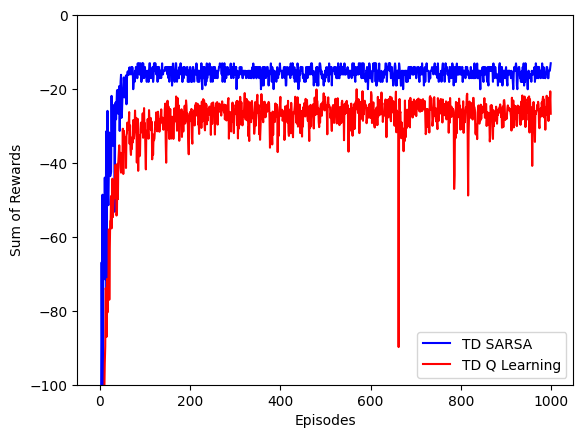

In [64]:
plt.plot(avgRewardQLearning, label = "TD SARSA", color = "blue")
plt.plot(avgRewardSarsa, label = "TD Q Learning", color = "red")
plt.xlabel("Episodes")
plt.ylabel("Sum of Rewards")
plt.ylim([-100, 0])
plt.legend()
plt.show()